In [4]:

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import altair as alt
import folium
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


df = pd.read_csv("data/security_incidents.csv")

In [6]:
categorical_columns = [ 
    "Motive",  "Location", "Attack context"]
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_encoded.replace("Unknown", 0, inplace=True)
scaler = StandardScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns = df_encoded.columns)
correlation_matrix3 = df_encoded.corr()

fig2 = px.imshow(correlation_matrix3,
                labels=dict(x="Features", y="Features", color="Correlation"),
                color_continuous_scale='RdBu_r', 
                zmin=-1, zmax=1)

# Customize the layout to ensure all labels are readable
fig2.update_layout(
    title="Correlation Matrix",
    xaxis=dict(tickmode='array', tickvals=list(range(len(correlation_matrix3.columns))), ticktext=correlation_matrix3.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(correlation_matrix3.columns))), ticktext=correlation_matrix3.columns),
    width=1000,  # You can further adjust the size of the plot
    height=1000,
    margin=dict(l=100, r=100, b=0, t=100)  # Adjust margins to fit labels
)

fig2.write_html("corr_matrix3.html")

from IPython.display import IFrame

# Display the saved file directly in Jupyter Notebook
IFrame("corr_matrix3.html", width=1000, height=1000)

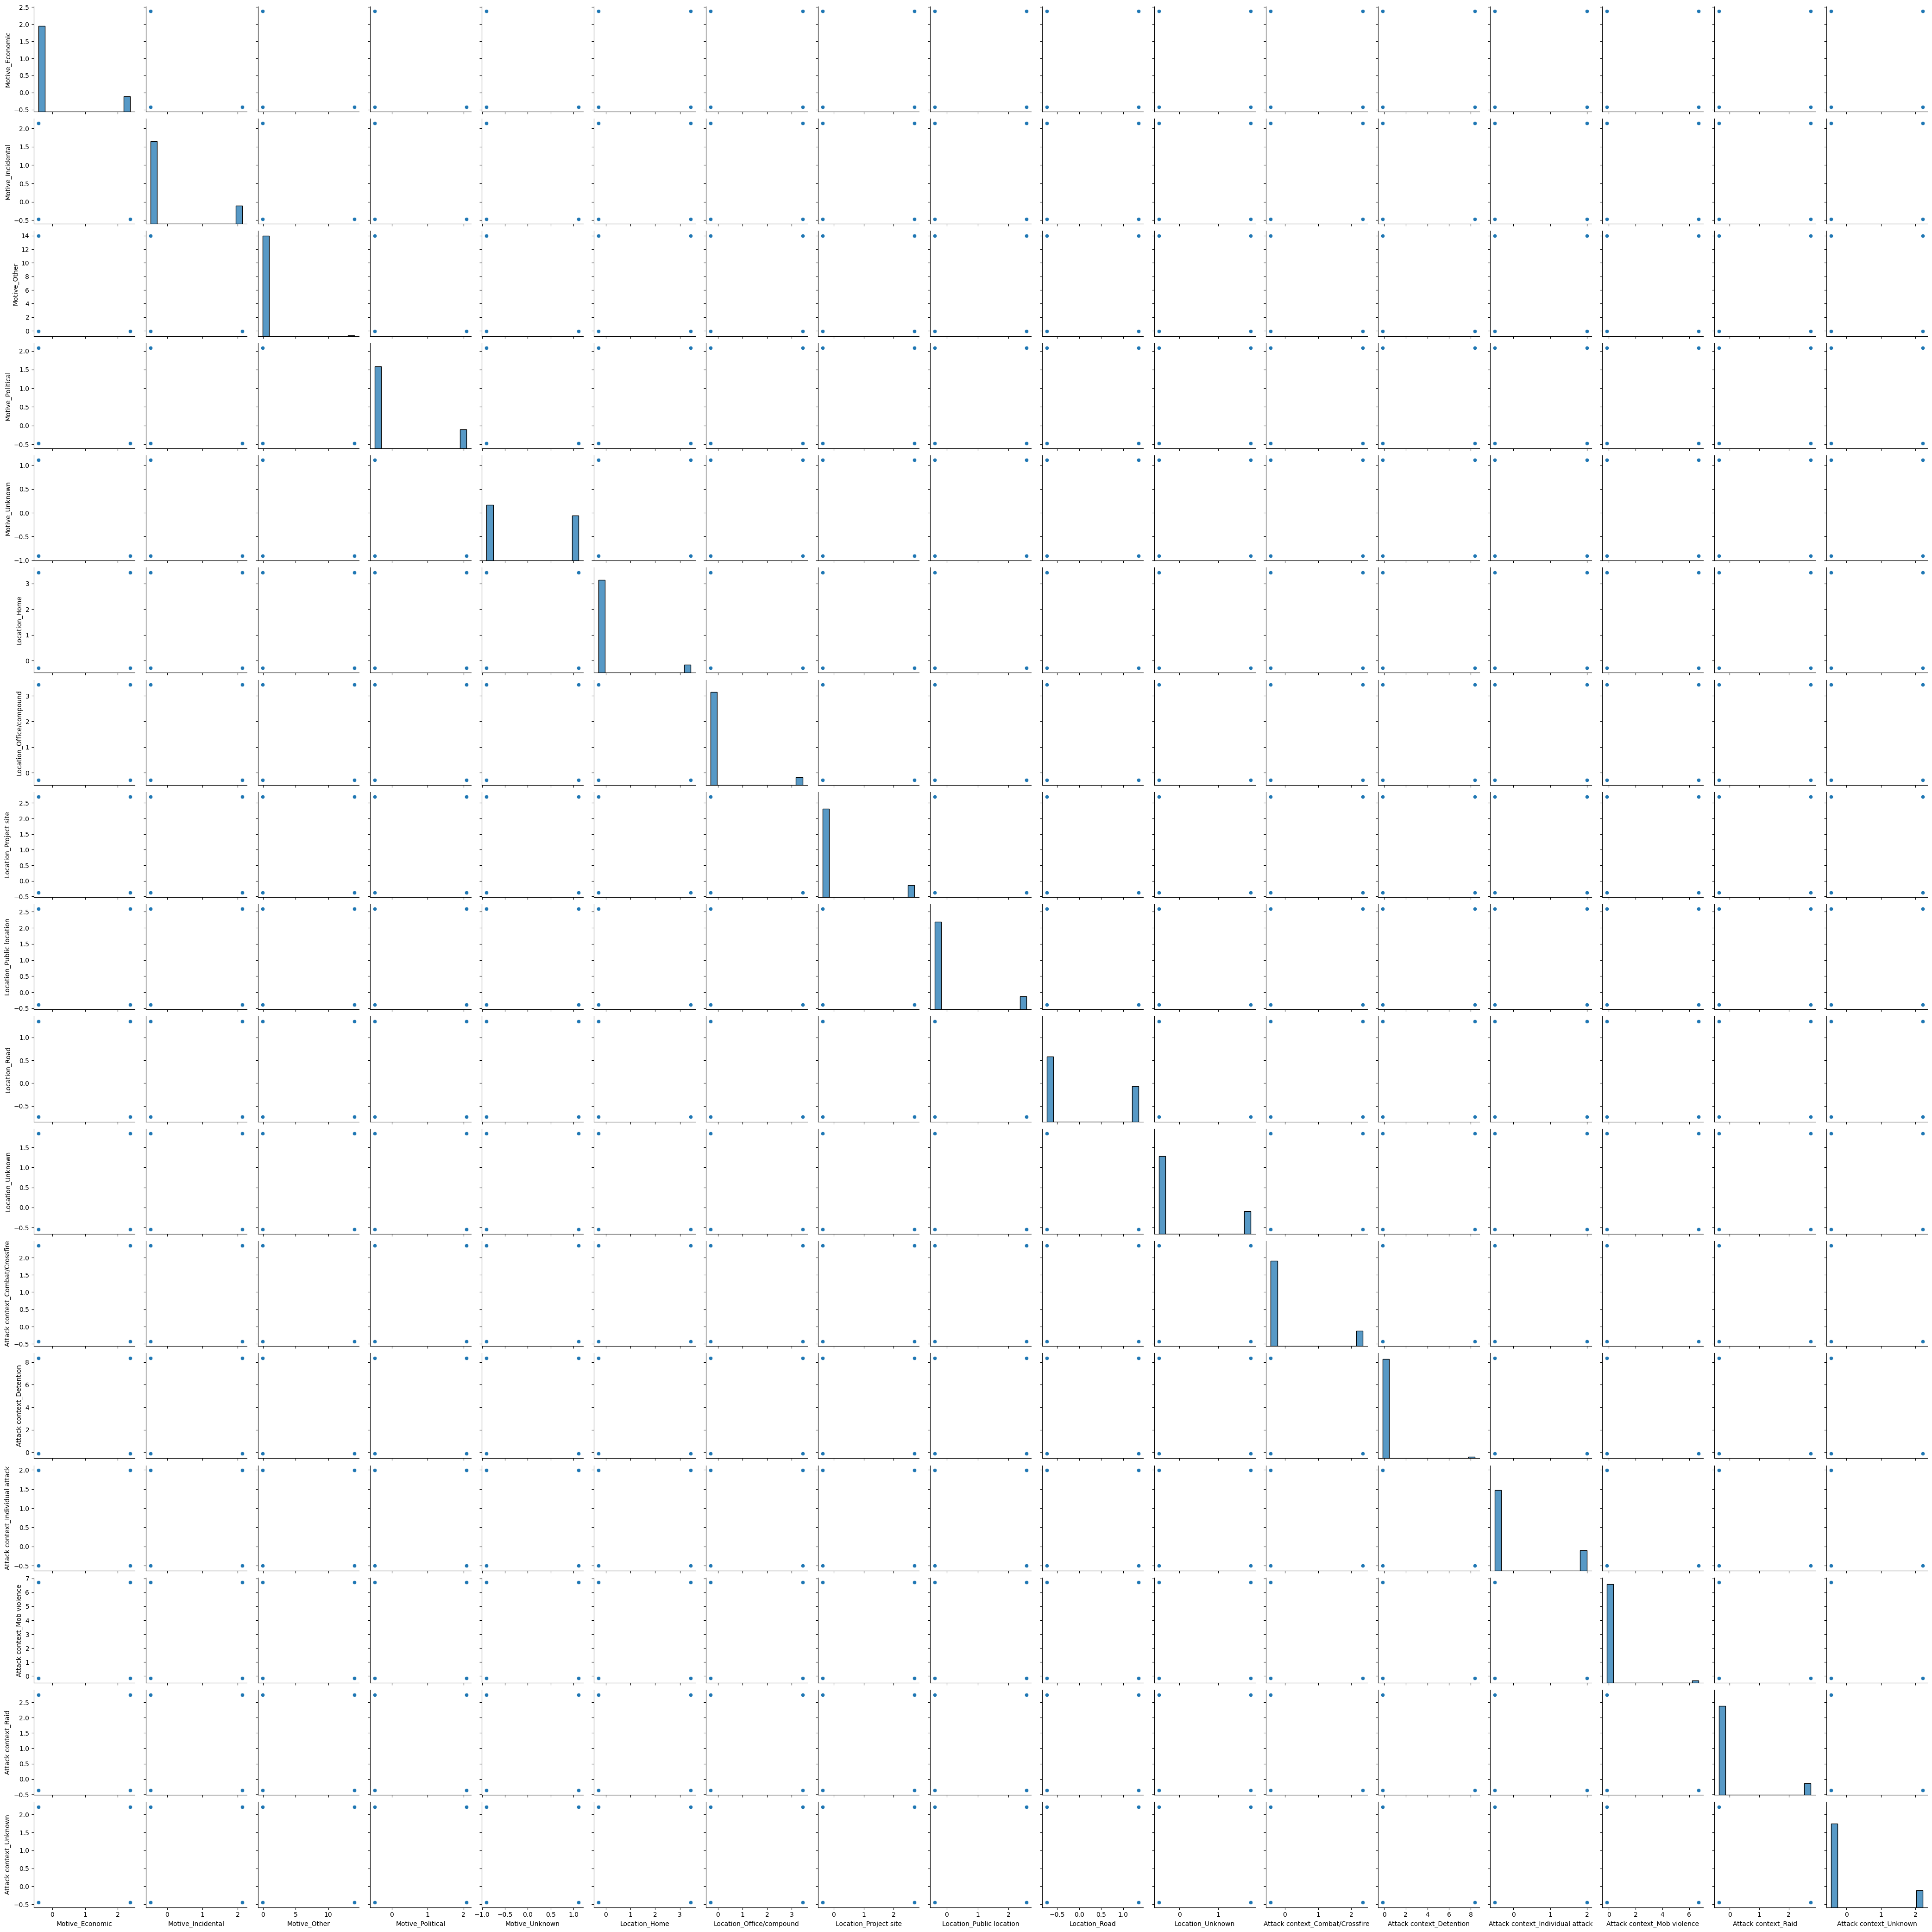

In [7]:
import seaborn as sns
sns.pairplot(df_encoded)
plt.show()